   # Shinnar-Le Roux RF Pulse Design with PulPy
  

In [4]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import pulpy as pp
import pulpy.rf as rf


import sigpy.plot as pl
import scipy.signal as signal
import matplotlib.pyplot as pyplot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


   ## Parameters for a time-bandwidth 4, linear-phase excitation

In [5]:
tb = 8
N = 128
d1 = 0.01
d2 = 0.01
ptype = 'ex'
ftype = 'ls'

   ## Design the excitation pulse

<IPython.core.display.Javascript object>


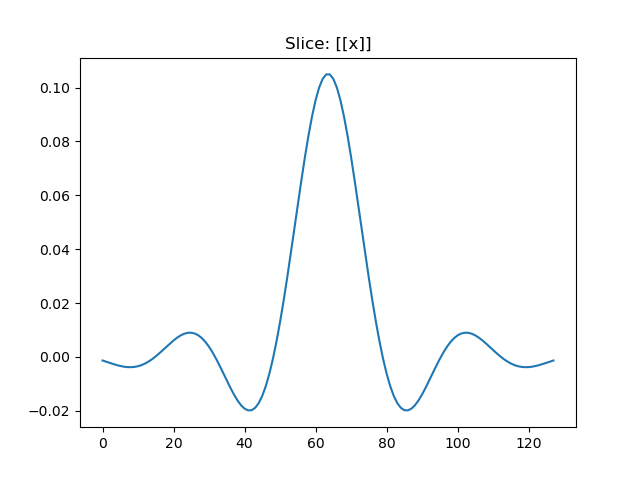

In [6]:
pulse = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2, False)
pl.LinePlot(pulse, mode='r')

## Simulate the excitation pulse's Mxy profile

<IPython.core.display.Javascript object>


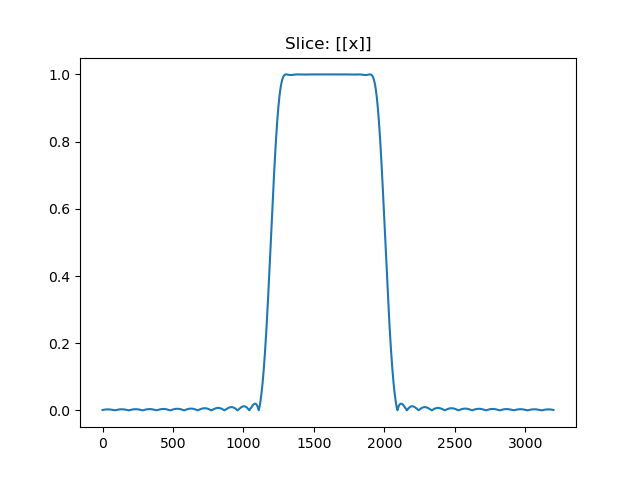

In [7]:
[a, b] = pp.sim.abrm(pulse, np.arange(-2*tb, 2*tb, 0.01), True)
Mxy = 2*np.multiply(np.conj(a), b)
pl.LinePlot(Mxy)

## Parameters for a time-bandwidth 8, minimum-phase inversion

In [11]:
tb = 8
N = 128
d1 = 0.01
d2 = 0.01
ptype = 'inv'
ftype = 'min'

## Design the inversion pulse

<IPython.core.display.Javascript object>


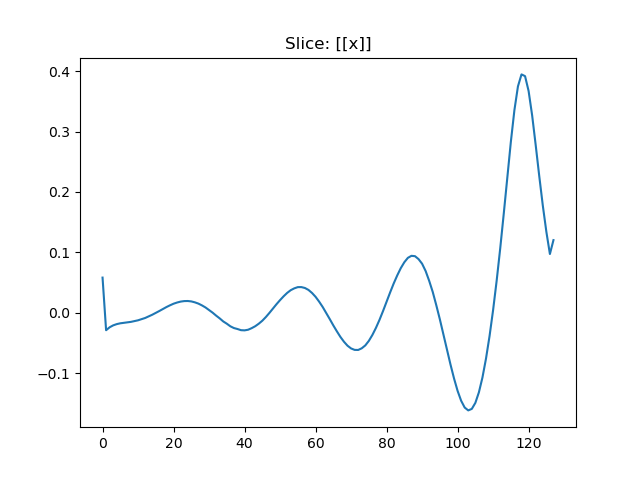

In [12]:
pulse = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2)
pl.LinePlot(pulse, mode='r')

## Simulate the inversion pulse's Mz profile

<IPython.core.display.Javascript object>


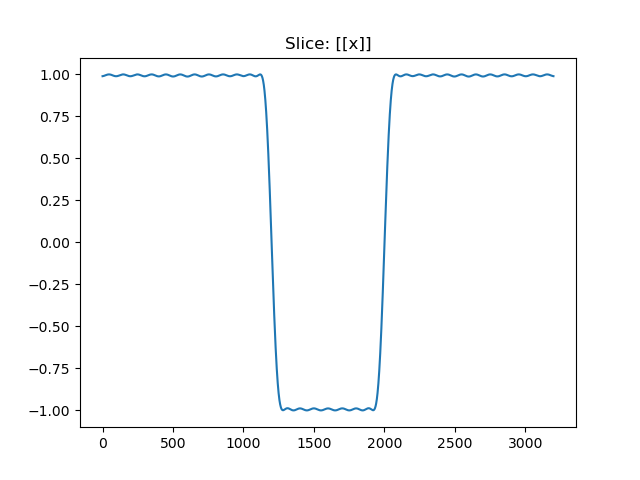

(3200,)


In [14]:
[a, b] = pp.sim.abrm(pulse, np.arange(-2*tb, 2*tb, 0.01))
Mz = 1-2*np.abs(b)**2
pl.LinePlot(Mz.T, mode='r')
print(np.shape(Mz))

# Design a root-flipped saturation pulse

<IPython.core.display.Javascript object>


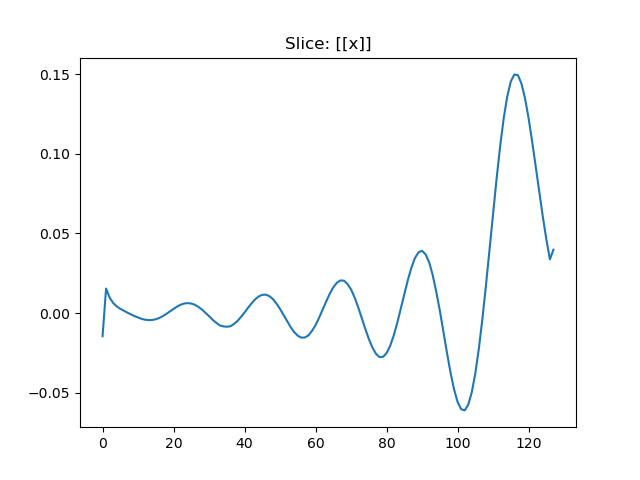

In [16]:
tb = 12
N = 128
d1 = 0.01
d2 = 0.001
ptype = 'sat'
ftype = 'min'
# conventional pulse
pulse = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2)
pl.LinePlot(pulse, mode='r')

<IPython.core.display.Javascript object>


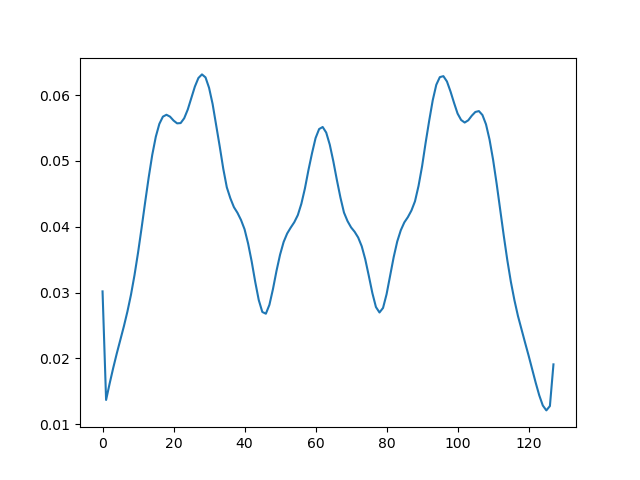

In [17]:
# root-flipped pulse
tb = 12
N = 128
d1 = 0.01
d2 = 0.001
flip = np.pi/2
ptype = 'sat'
[bsf, d1, d2] = rf.slr.calc_ripples(ptype, d1, d2)
b = bsf*rf.slr.dzmp(N, tb, d1, d2)
b = b[::-1]
[pulse, bRootFlipped] = rf.slr.root_flip(b, d1, flip, tb)

pyplot.figure()
pyplot.plot(np.abs(pulse))

# Recursive Pulse Design for a 3-Segment FLEET EPI scan

In [18]:
# Design the pulses
Nseg = 3 # number of EPI segments/RF Pulses
tb = 4
N = 2000
seSeq = True
tbRef = 8 # time-bandwidth of ref pulse
[pulses, _] = rf.slr.dz_recursive_rf(Nseg, tb, N, seSeq, tbRef)

<IPython.core.display.Javascript object>


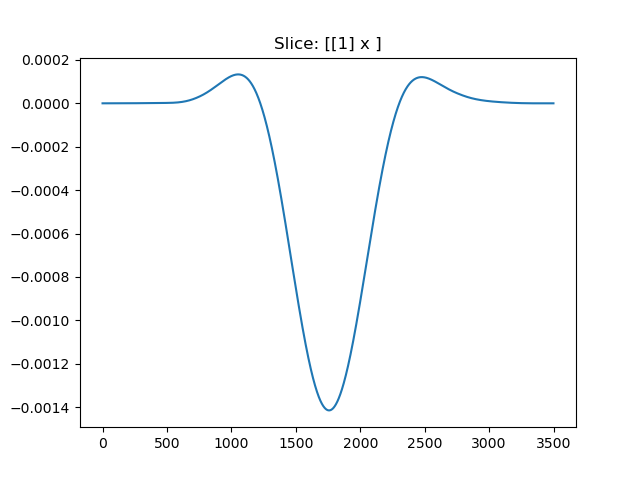

/home/jonathanmartin/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [19]:
# Plot them
pl.LinePlot(pulses.T, mode = 'real')

In [20]:
# Simulate them
Mxy = np.zeros((np.size(np.arange(-4*tb, 4*tb, 0.01)), Nseg), dtype = complex)
Mz = np.ones(np.size(np.arange(-4*tb, 4*tb, 0.01)))
for ii in range(0, Nseg):    
    [a, b] = pp.sim.abrm(pulses[:, ii], np.arange(-4*tb, 4*tb, 0.01), True)
    Mxy[:, ii] = 2*Mz*np.multiply(np.conj(a),b)
    Mz = Mz*(1 - 2*np.abs(b)**2)

<IPython.core.display.Javascript object>


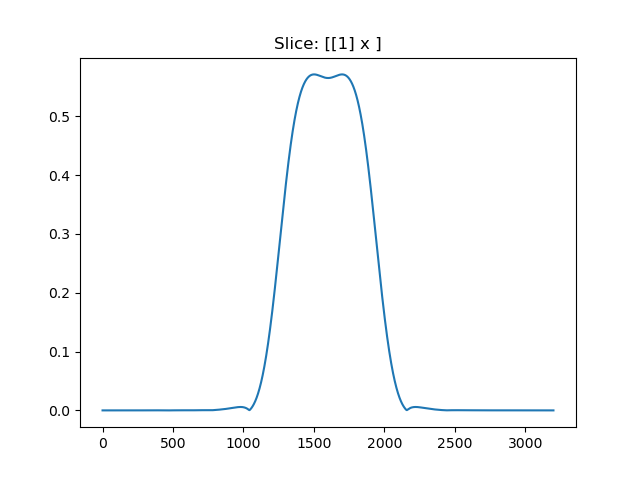

In [21]:
# Plot Mxy profiles
pl.LinePlot(Mxy.T)